In [3]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb


In [4]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [5]:
df = read_excel("https://data.hossam.kr/D01/mpg.xlsx")
df

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


#### 문제1
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

NameError: name 'fig' is not defined

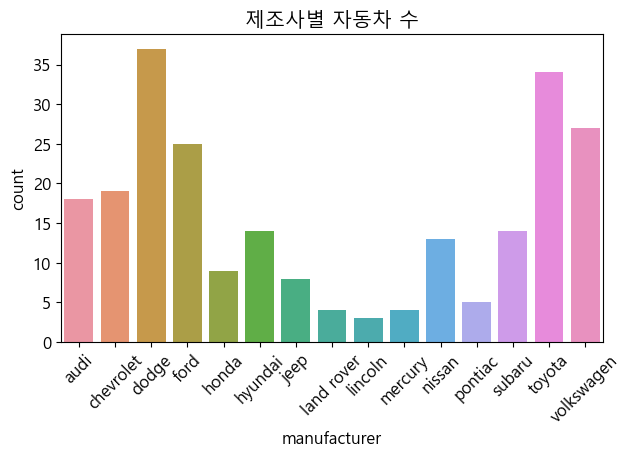

In [6]:
sb.countplot(data= df, x= 'manufacturer')
plt.title('제조사별 자동차 수')
plt.xticks(rotation = 45)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()
plt.close()

#### 문제2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

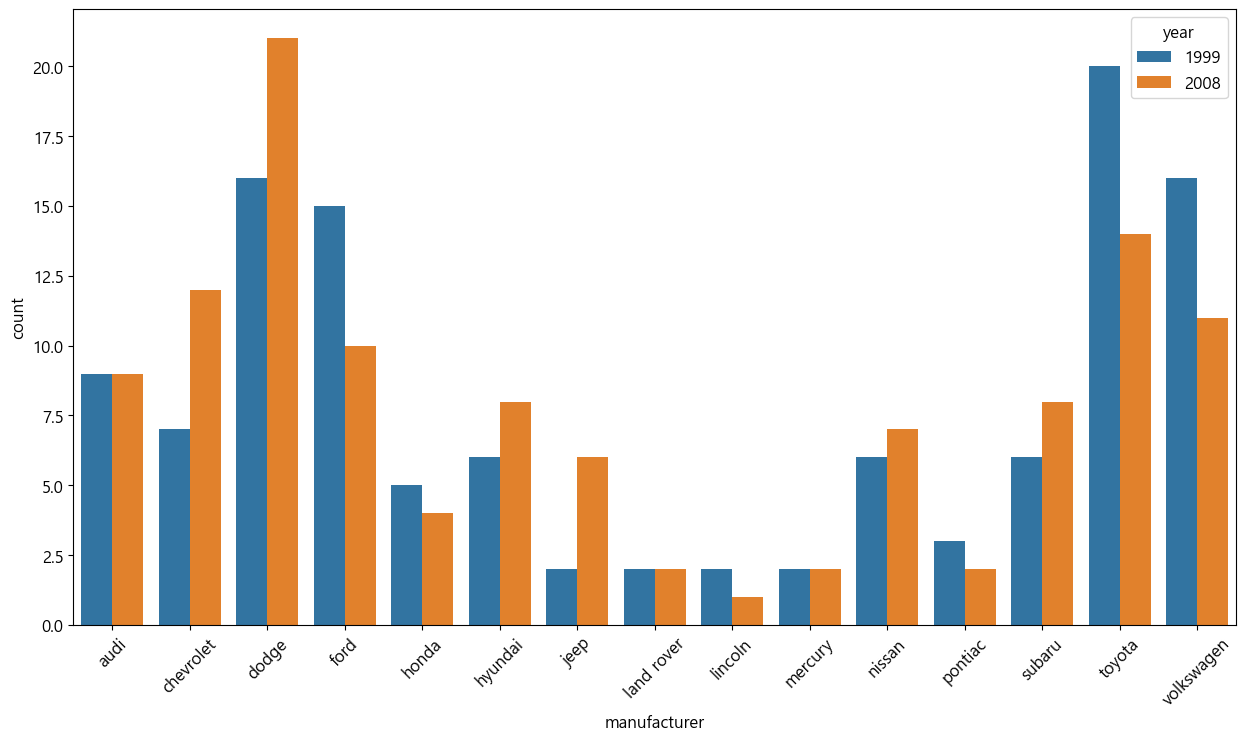

In [ ]:
sb.countplot(data= df, x= 'manufacturer',hue = 'year')
plt.xticks(rotation = 45)
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()
plt.close()

#### 문제3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

In [ ]:
df['drv'].value_counts() # 데이터프레임에서 각 요소별로 몇 개의 데이터가 있는지 확인

drv
f    106
4    103
r     25
Name: count, dtype: int64

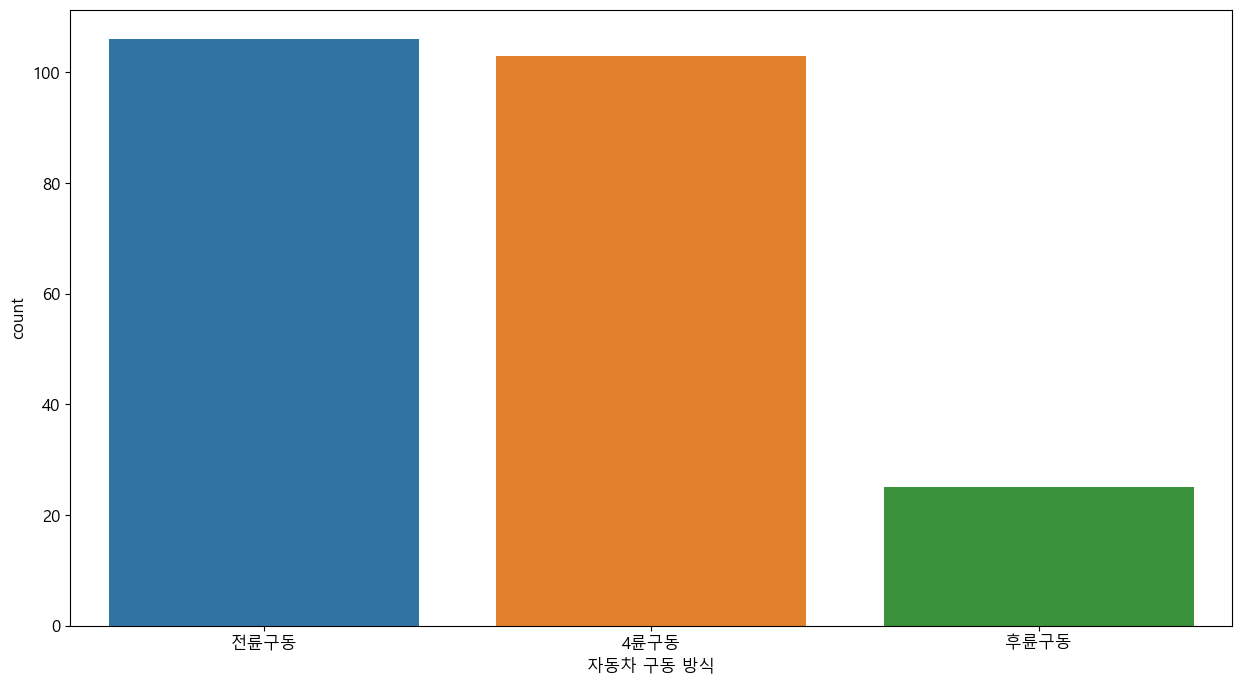

In [ ]:
sb.countplot(data= df, x= 'drv', )
### 인덱스를 이용해서 xlabel을 바꾸자.
fig.set_figwidth(8)
fig.set_figheight(7)
plt.xticks([0,1,2], ['전륜구동','4륜구동','후륜구동'])
plt.xlabel(xlabel='자동차 구동 방식')
# xticks = lambda x : "전륜구동" if x == "f" else('후륜구동' if x == 'r' else '4륜구동')
plt.show()
plt.close()

#### 문제 4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

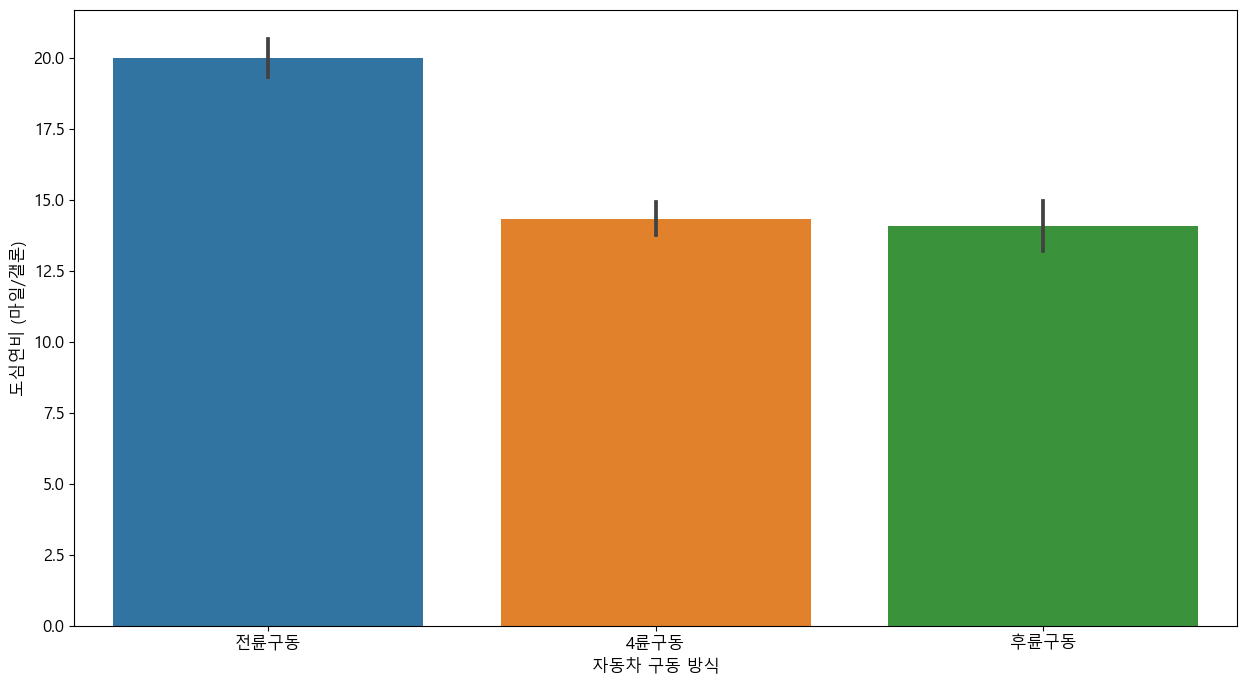

In [ ]:
sb.barplot(data = df, x= 'drv', y= 'cty', estimator='mean')
plt.xticks([0,1,2], ['전륜구동','4륜구동','후륜구동'])
plt.ylabel('도심연비 (마일/갤론)')
#plt.xlabel(xlabel=None) x-axis 라벨 삭제
plt.xlabel(xlabel='자동차 구동 방식')
plt.show()
plt.close()

#### 문제 5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

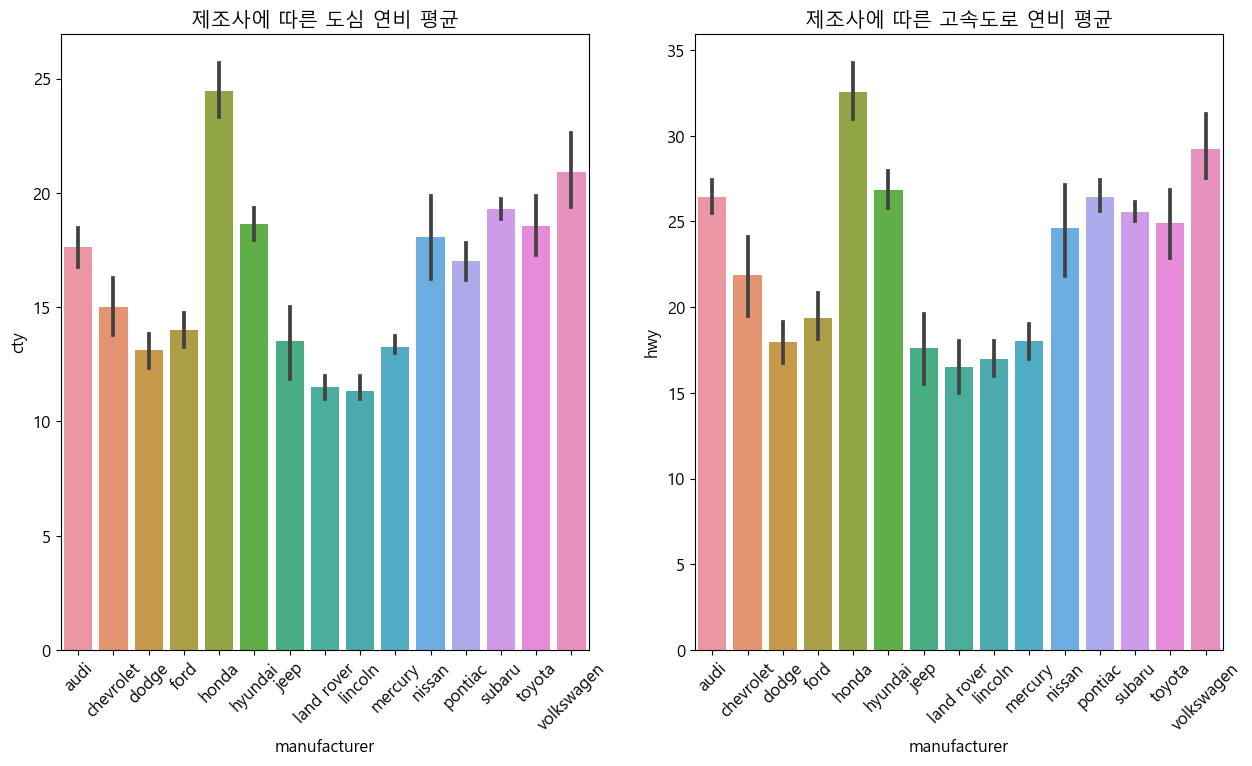

In [ ]:
plt.rcParams["figure.figsize"] = (15, 8)
fig, (ax1,ax2) = plt.subplots(1,2)
sb.barplot(ax= ax1, data =df, x= 'manufacturer', y= 'cty', estimator='mean')
sb.barplot(ax= ax2, data = df, x= 'manufacturer', y= 'hwy', estimator='mean')
xlabels = df['manufacturer'].unique()
 ax2.title.set_text('제조사에 따른 고속도로 연비 평균')
ax1.set_xticklabels(xlabels, fontsize=12, rotation=45)
ax2.set_xticklabels(xlabels, fontsize=12, rotation=45)
plt.show()
plt.close()

#### 문제 6
배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브플롯에 각 그래프를 시각화하고 추세선을 포함시키시오.

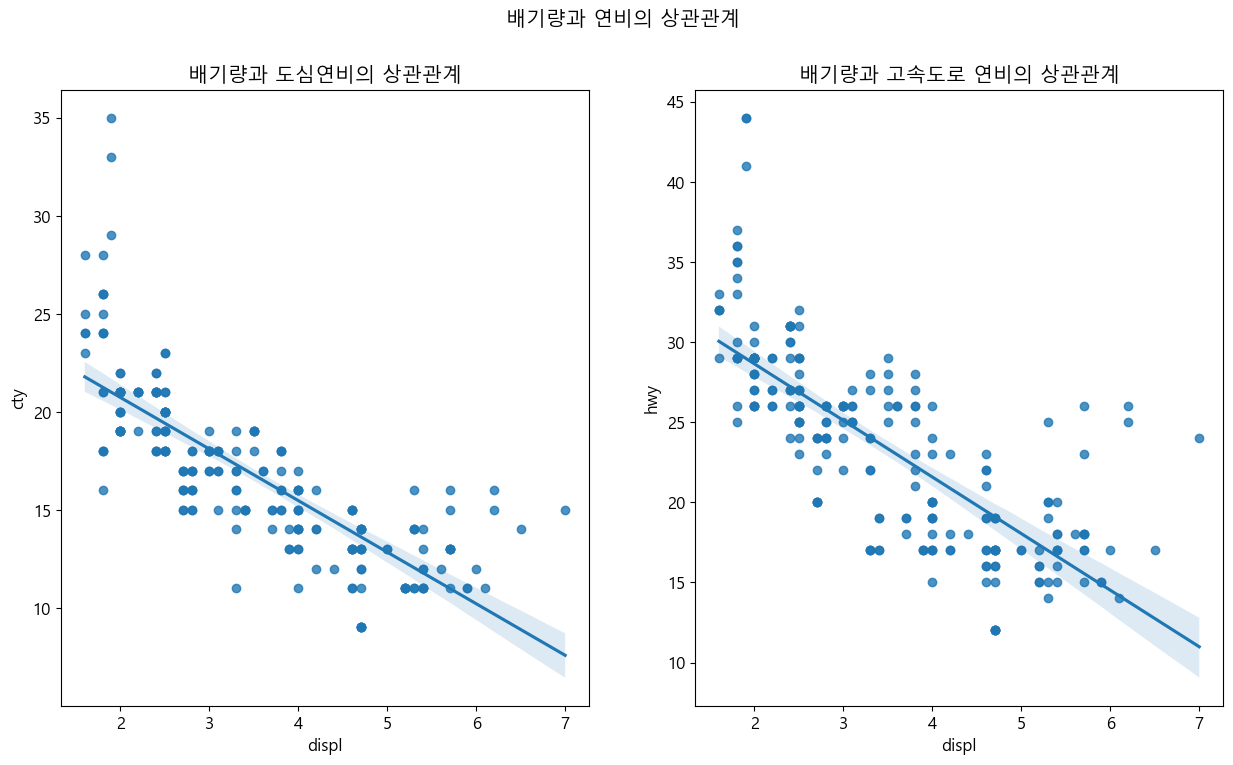

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
sb.regplot(data=df, x= 'displ', y= 'cty', ax= ax1)
sb.regplot(data=df, x= 'displ', y= 'hwy', ax= ax2)
fig.suptitle('배기량과 연비의 상관관계')
ax1.title.set_text('배기량과 도심연비의 상관관계')
ax2.title.set_text('배기량과 고속도로 연비의 상관관계')


#### 문제 7
철수는 새로 자동차를 구입하고자 한다.
좋은 자동차를 구입하는데 있어서 가장 중요시 되는 조건은 평균연비이다.

##### 데이터 전처리 요구사항

1. 데이터 프레임에 평균연비에 대한 파생변수를 생성하시오.
2. 전체 평균연비에 대한 평균값을 구하고 이 평균값보다 평균연비가 높은 경우 'Pass', 그렇지 않을 경우 'Fail'로 표시할 수 있는 파생변수를 `평가`라는 이름으로 추가하시오.
3. 평균연비에 대한 백분율을 구한 후 90점 이상일 경우 `A`, 80점 이상일 경우 `B`, 70점 이상일 경우 `C`, 그 외의 경우는 D로 하여 등급이라는 컬럼을 추가하시오.


다음의 네가지 지표를 확인할 수 있는 서브플롯을 제시하라

자동차 구동방식별 `평가`에 대한 빈도

자동차 구동방식별 `등급`에 대한 빈도

자동차 연료 종류 `평가`에 대한 빈도

자동차 연료 종류 `등급`에 대한 빈도

자동차 분류별 `평가`에 대한 빈도

자동차 분류별 `등급`에 대한 빈도

>평균연비는 고속도로연비와 도심연비에 대한 평균이다.

In [47]:
df1 = df.copy()
#df1['averagefe'] = (df['cty'] + df['hwy'])/2
df1['averagefe'] = df1.loc[:,'cty':'hwy'].mean(axis=1)
df1

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,averagefe
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [11]:
import numpy as np

In [48]:
total_average = df1['averagefe'].mean()
print(total_average)
df1['평가'] =np.where(df1['averagefe'] >= total_average, 'Pass', 'Fail')
df1

20.14957264957265


,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,averagefe,평가
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,Pass


In [56]:
fe_percentile = df1['averagefe']/total_average*100
conditions =[(fe_percentile >= 90),
                                (fe_percentile >=80),
                                  (fe_percentile >=70)
]
                               
value = ["A","B","C"]
                    

In [57]:
df1['등급'] = np.select(conditions,value,default= 'D')
df1


,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,averagefe,평가,등급
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,Pass,A
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,Pass,A
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,Pass,A
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,Pass,A
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,Pass,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,Pass,A
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,Pass,A
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,Pass,A
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,Pass,A


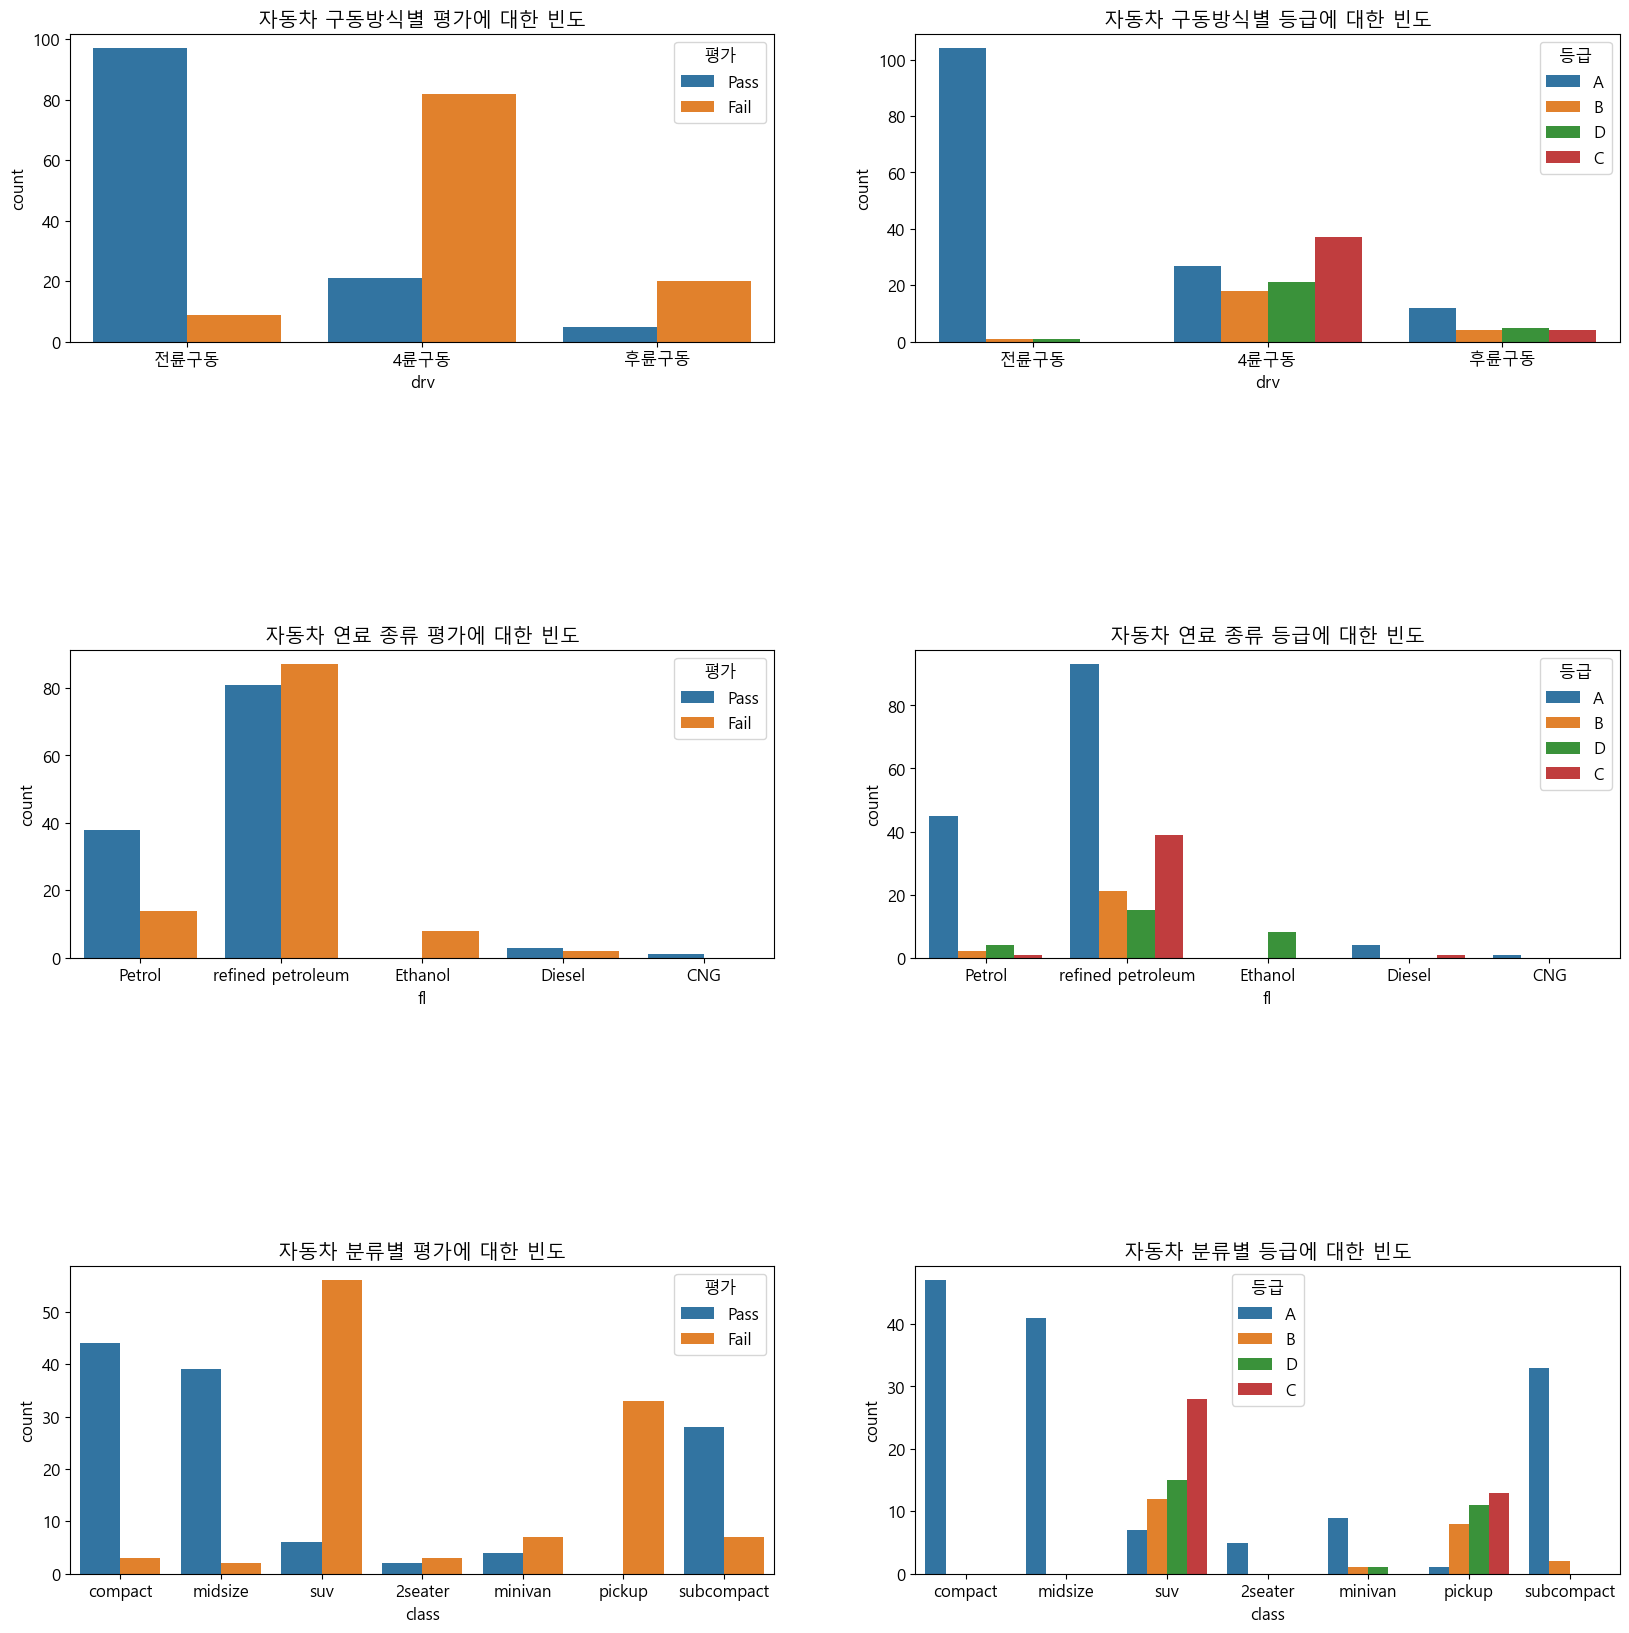

In [59]:
plt.rcParams["figure.figsize"] = (20, 20)
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
fig.subplots_adjust(hspace=1)

sb.countplot(data= df1, x= 'drv', hue = '평가', ax = ax1 )
ax1.set_xticks([0,1,2], ['전륜구동','4륜구동','후륜구동'])
ax1.title.set_text('자동차 구동방식별 평가에 대한 빈도')

sb.countplot(data= df1, x= 'drv', hue = '등급', ax = ax2 )
ax2.title.set_text('자동차 구동방식별 등급에 대한 빈도')
ax2.set_xticks([0,1,2], ['전륜구동','4륜구동','후륜구동'])

sb.countplot(data= df1, x= 'fl', hue = '평가', ax = ax3 )
ax3.title.set_text('자동차 연료 종류 평가에 대한 빈도')
ax3.set_xticks([0,1,2,3,4], ['Petrol','refined petroleum','Ethanol','Diesel','CNG'])

sb.countplot(data= df1, x= 'fl', hue = '등급', ax = ax4 )
ax4.title.set_text('자동차 연료 종류 등급에 대한 빈도')
ax4.set_xticks([0,1,2,3,4], ['Petrol','refined petroleum','Ethanol','Diesel','CNG'])

sb.countplot(data= df1, x= 'class', hue = '평가', ax = ax5 )
ax5.title.set_text('자동차 분류별 평가에 대한 빈도')

sb.countplot(data= df1, x= 'class', hue = '등급', ax = ax6 )
ax6.title.set_text('자동차 분류별 등급에 대한 빈도')

